# Assignment 3

### Dependent and independent t-tests

### Dataset

Retirement homes are multi-residence housing facilities intended for the elderly, for a temporary or definitive stay. A problem for elderly people is feeling lonely, and the need for interaction. This is where AI can help. Robot pets (i.e., a robot on the inside, stuffed animal on the outside) that react to touch, voice, and act by themselves, can (perhaps) combat this loneliness (real pets usually aren't allowed inside retirement homes).

In today's workgroup you will analyse data from a study interested in investigating the effectiveness of robot pets in combatting loneliness. In this study, the loneliness of elderly people was measured with a questionaire, both at the start of the study (pre-test), and after spending 3 months with their robot pet (post-test). These questions were summarized into two loneliness scores for each individual (one pre- and one post-test score). Elderly were randomly divided into two groups, one group who received a robot dog and another who received a robot cat.

In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

sns.set_style("whitegrid")

### Exercise 1

We are interested in whether the robot pets affect loneliness. 

1. Describe a hypothesis that tests this. Is this a dependent or independent test (i.e., paired or unpaired data)?
2. Load the data set and print out the keys.
3. Before doing a statistical test, it is always a good idea to have a look at your data. Choose an appropriate plot to visualize the data. Properly annotate the plot with axes labels and a figure legend.<div style='text-align: right;'>**4 points**</div>


In [402]:
# your code/answer here
#Answer1.
#Hypothesis of this test is that loneliness scores of older people are less lonely after using a robotic pet than before.
#Null hypothesis is robot pets will not change the loneliness.
#This is dependent test because the loneliness of the same person is measured before and after use.
#Thus, paired data are obtained.



In [403]:
# your code/answer here
#Answer2.
dataframe = pd.read_csv('Loneliness.csv')

print(dataframe.columns)


Index(['Group', 'Lon_t1', 'Lon_t2'], dtype='object')


Before we can do a statistical test on the data, we will first create a list/array of all the differences of the scores before and after the treatment, such that $$x_{\Delta} = x_{t2}-x_{t1}$$

   Group  Lon_t1  Lon_t2  Difference
0      1      80      40         -40
1      1      57      38         -19
2      1      89      47         -42
3      1      70      53         -17
4      1      79      56         -23


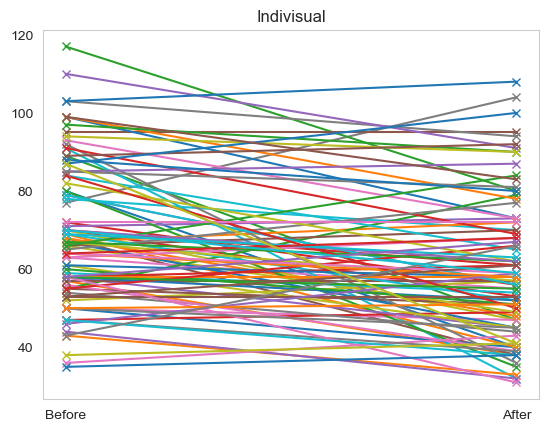

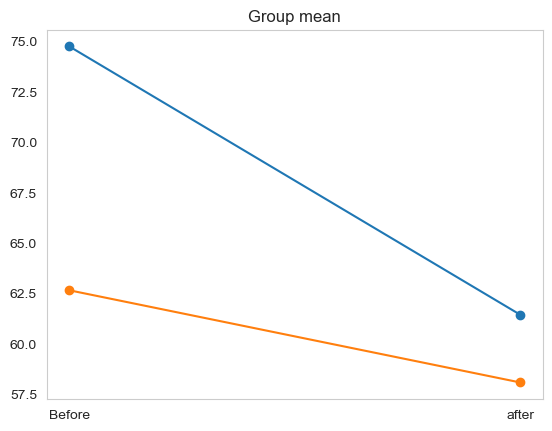

In [404]:
# your code/answer here
#Answer3.
#xΔ = xt2 - xt1
#xΔ difference
#xt2 After using Robot Pet
#xt1 Before using Robot Pet

dataframe["Difference"] = dataframe["Lon_t2"] - dataframe["Lon_t1"]
print(dataframe.head())

#Indivisual result
for i in range(len(dataframe)):
    group = dataframe.loc[i, "Group"]
    plt.plot(["Before", "After"], 
             [dataframe.loc[i, "Lon_t1"], dataframe.loc[i, "Lon_t2"]], marker="x")

plt.grid()
plt.title("Indivisual")
plt.show()

#Group mean result
for group in [1, 2]:
    group_data = dataframe[dataframe["Group"] == group]
    plt.plot(["Before", "after"],
             [group_data['Lon_t1'].mean(), group_data['Lon_t2'].mean()],marker='o')
    
plt.grid()
plt.title("Group mean")
plt.show()



### Exercise 2

Now that we have these scores we can do a t-test for paired data. 

1. First, let's calculate the mean, standard deviation, and the number of observations. Create a separate variable for each of these. 
2. Now that we have these values, calculate the standard error (SE).
3. Now calculate the t-score according to the formula: $$t = \frac{\bar{x}_{diff} - \mu_{expected}}{SE_{\bar{x}_{diff}}}$$

4. Now that we got our t-score, we normally would look it up in a table, or use a function to calculate that for us. Write a function that takes a t-score, degrees of freedom, and a variable specifying one-sided or two-sided test and returns a p-value. You can use the `stats.t.sf` function from the scipy toolbox.
5. Use the function you wrote above to compute the p-value for your t-score, degrees of freedom and type of test.
6. For a signficance level of $\alpha = $ 0.05, formulate a conclusion about the hypothesis you specified in Exercise 1.<div style='text-align: right;'>**7 points**</div>

In [405]:
# your code/answer here

delta = dataframe["Lon_t2"] - dataframe["Lon_t1"]
mean = delta.mean()

std = delta.std()

number = delta.count()

print(f"mean is : {mean}")
print(f"standard deviation is : {std}")
print(f"number of observation is : {number}")



mean is : -9.274725274725276
standard deviation is : 16.36871401591458
number of observation is : 91


In [406]:
# your code/answer here
#SE = Standard deviation/√number of observation

se = std / math.sqrt(number)
print(f"SE is : {se}")

SE is : 1.7159074699520793


In [407]:
# your code/answer here
#According to general formula
#x_diff is mean
#𝜇expected is expected mean
#SE_xdiff is se we previously calcuated.

expected = 0
t_score = (mean -expected) / se

# 結果を表示
print(f"t score (t) is : {t_score}")


t score (t) is : -5.4051430144915065


In [408]:
# your code/answer here

def calculate_p(t_score, df, one_sided=False):
    #Calculate one-sided probability.
    p = stats.t.sf(abs(t_score), df)

    #if true, return p.
    if one_sided:
        return p
    #if false, return the both side.
    else:
        return p*2


In [409]:
# your code/answer here
#degrees of freedom is observerd number - 1
df = number -1 

p = calculate_p(t_score, df, one_sided=False)

print(f"p value is : {p}")

#p value is : 5.264906242767012e-07
#This is 5.264906242767012 × 10^(-7) = 0.0000005264...
#This mean the robot per has a very strong and significant result for loneliness.

p value is : 5.264906242767012e-07


In [410]:
# your code/answer here
#At α = 0.05, the p-value obtained is very small at 0.0000005264....
#So,  p < α, the null hypothesis can be rejected.
#It is highly likely that the use of robotic pets has led to siginificant changes in the loneliness scores of older people.


### Exercise 3

We have investigated whether the robots have a statistical impact on loneliness. Now we're going to look at which robot pet performed better, the dog or the cat? For this we will again look at the difference scores between the pre- and the post-test for each pet. Specifically, we will investigate whether the change in loneliness between the pre-test and the post-test is different between the cats and dogs. 

1. Formulate the hypothesis for this test. Is this a dependent or independent test (paired or unpaired data)?
2. Extract the relevant data points and put them into distinct variables.
3. Choose an appropriate plot to visualize the data and label it properly.
4. Compute the mean, standard deviation and number of observations in each group and store them in separate variables. 
5. Calculate the standard error (SE) of this modelled distribution. Since we take the sample difference of the means, the SE is calculated as follows:

$$SE_{\bar{x}_{group1} - \bar{x}_{group2}} = \sqrt{\dfrac{s^{2}_{group1}}{n_{group1}}+\dfrac{s^{2}_{group2}}{n_{group2}}}$$

6. Calculate the t-statistic and the p-value. Keep in mind that we are using a t-distribution of the sample difference of two means. 
7. Finally, use the p-value and a signficance level of $\alpha =$ 0.05 to draw a conclusion about the hypothesis you formulated in item 1.
8. A typical example of how statistical tests results are formulated in scientific papers is as follows: 
"*We observed a significantly higher test score for group1 (M=, SD=) than group2 (M= , SD= ) with t(df)= and p= .*"
Formulate the result of your statistical test in this format.<div style='text-align: right;'>**8 points**</div>

In [411]:
# your code/answer here
#Answer1
#First, formulate the hypothesis
#Hypothesis is there is a difference between the effects of robotic dogs and robotic cats.
#Null hypothesis is there is no difference in the effect (change in loneliness) between robotic dogs and robotic cats.

#In other words, is there a difference in the change in loneliness between dogs and cats?

#Also, this is an independent test (unpaired)
#Because to compare separate groups like
#Group 1: Older people using a dog robot
#Group 2: Older people using a cat robot

#In other words, people in the dog group and people in the cat group are separate people 
#and there is no association between these two groups.

In [412]:
# your code/answer here
#Anser2
dataframe["Difference"] = dataframe["Lon_t2"] - dataframe["Lon_t1"]

# Dog group
dog_group = dataframe[dataframe["Group"] == 1]
dog_diff = dog_group["Difference"]  

#Cat group
cat_group = dataframe[dataframe["Group"] == 2]
cat_diff = cat_group["Difference"]  



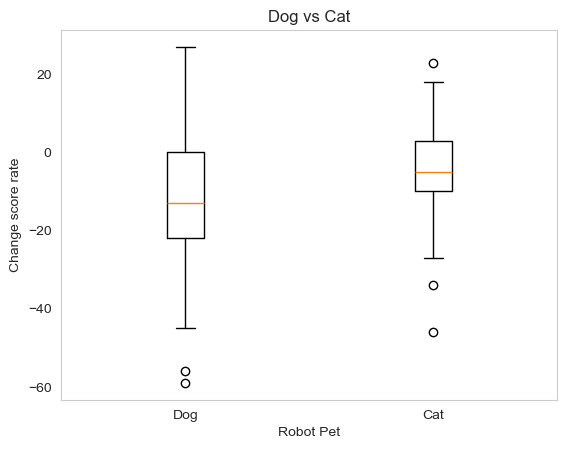

In [413]:
# your code/answer here
#Answer3
data = [dog_diff, cat_diff]
labels = ["Dog", "Cat"]
plt.boxplot(data, labels=labels)

plt.ylabel("Change score rate")
plt.xlabel("Robot Pet")

plt.title("Dog vs Cat")
plt.grid()
plt.show()

In [414]:
# your code/answer here
#Answer4
print(f"number: {len(dog_diff)}")
print(f"mean: {np.mean(dog_diff):.4f}")
print(f"standard deviation: {np.std(dog_diff)}")

print(f"number: {len(cat_diff)}")
print(f"mean: {np.mean(cat_diff):.4f}")
print(f"standard deviation: {np.std(cat_diff)}")

number: 49
mean: -13.3061
standard deviation: 17.61053033960503
number: 42
mean: -4.5714
standard deviation: 13.08605738789127


In [415]:
# your code/answer here

### Exercise 4

In Exercises 2 and 3 you implemented the independent and dependent tests yourself, but of course there are libraries that do this. Here we will use those libraries and compare the results to the manual outcomes.

1. Use `scipy.stats.ttest_rel(...)` [(documentation)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html) to calculate the p-value of the paired t-test, and check whether this answer is the same as the one we calculated above. Note: `scipy.stats` has been imported as `stats`, so you can just use `stats.ttest_rel(...)`.
2. Do the outcomes fully agree? Justify your answer.<div style='text-align: right;'>**2 points**</div>

In [416]:
# your code/answer here
#Anser1
import scipy as pd
before_test = dataframe["Lon_t1"] 
after_test = dataframe["Lon_t2"]

t_rel, p_rel = stats.ttest_rel(before_test,after_test)

print(f"t value is : {t_rel}")

print(f"p value is : {p_rel}")

#Answer2


t value is : 5.4051430144915065
p value is : 5.264906242767012e-07


### Exercise 5

1. Use `scipy.stats.ttest_ind(...)` [(documentation)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the p-value of the independent t-test, and check whether the outcome is the same as the one calculated manually above. 
2. Do the outcomes fully agree? Justify your answer.<div style='text-align: right;'>**2 points**</div>

In [ ]:
# your code/answer here
#Answer1
t_ind, p_ind = stats.ttest_ind(dog_diff, cat_diff)


print(f"t value is : {t_ind}")

print(f"p value is : {p_ind}")

#Answer2



t value is : -2.6189686647554624
p value is : 0.0103668378408101


**Total number of points**: 19